In [29]:
import pandas as pd
import random

# Function to generate a more realistic dataset for the "Good" app with logically explainable Allow_Loan
def generate_realistic_good_app_dataset(num_samples=1000):
    data = {
        'Full_Name': [f'Customer_{i}' for i in range(1, num_samples + 1)],
        'Contact_Email': [f'customer{i}@example.com' for i in range(1, num_samples + 1)],
        'Contact_Phone': [f'555-555-{i:04d}' for i in range(1, num_samples + 1)],
        'Residential_Address': [f'Address_{i}' for i in range(1, num_samples + 1)],
        'Employment_Status': random.choices([1, 2 , 3], k=num_samples),             #1 = 'Employed', 2 = 'Self-Employed', 3 = 'Unemployed'
        'Monthly_Income': [4000 + random.randint(0, 3000) for _ in range(num_samples)],
        'Outstanding_Loans': random.choices([1, 0], k=num_samples),                   #1 = 'Yes', 2 =  'No' 
        'Total_Monthly_Expenses': [2000 + random.randint(-500, 500) for _ in range(num_samples)],
        'Loan_Amount_Requested': [5000 + random.randint(0, 5000) for _ in range(num_samples)],
        'Loan_Purpose': random.choices([1, 2, 3, 4], k=num_samples),                   #1 = 'Home', 2 = 'Personal', 3 = 'Business', 4 = 'Education'
        'Defaulted_Loan': random.choices([1, 0], k=num_samples),                       #1 = 'Yes', 2 =  'No'
        'Credit_Score': [600 + random.randint(-50, 50) for _ in range(num_samples)],
    }

    for i in range(len(data)):
        if(data['Employment_Status'][i] == 3):
            data['Monthly_Income'][i] = 0

    # Logical rules for Allow_Loan
    data['Allow_Loan'] = [1 if ((employment_status == 1 and random.randint(0, 3) == 1)) or
                          (random.randint(0, 10) == 1) or
                                    (income > 5000 and outstanding_loans == 0 and purpose in [1 , 4]) or
                                  (income > 4000 and outstanding_loans == 0 and purpose == 2) or
                                  (income > 3000 and outstanding_loans == 0 and purpose ==  3)
                          else 0
                          for income, outstanding_loans, purpose, employment_status in zip(data['Monthly_Income'],
                                                                        data['Outstanding_Loans'],
                                                                        data['Loan_Purpose'],
                                                                        data['Employment_Status'])]

    return pd.DataFrame(data)

# Generate more realistic datasets for the "Good" and "Bad" apps
realistic_good_app_data = generate_realistic_good_app_dataset()




In [30]:
import pandas as pd
import random

# Function to generate a more realistic dataset for the "Bad" app with logically explainable Allow_Loan
def generate_realistic_bad_app_dataset(num_samples=1000):
    data = {
        'Full_Name': [f'Customer_{i}' for i in range(1, num_samples + 1)],
        'Contact_Email': [f'customer{i}@example.com' for i in range(1, num_samples + 1)],
        'Contact_Phone': [f'555-555-{i:04d}' for i in range(1, num_samples + 1)],
        'Residential_Address': [f'Address_{i}' for i in range(1, num_samples + 1)],
        'Employment_Status': random.choices([1, 2, 3], k=num_samples),  # 1 = 'Employed', 2 = 'Self-Employed', 3 = 'Unemployed'
        'Monthly_Income': [3000 + random.randint(-1000, 1000) for _ in range(num_samples)],
        'Outstanding_Loans': random.choices([1, 0], k=num_samples),  # 1 = 'Yes', 0 = 'No'
        'Total_Monthly_Expenses': [2000 + random.randint(-500, 500) for _ in range(num_samples)],
        'Loan_Amount_Requested': [5000 + random.randint(0, 5000) for _ in range(num_samples)],
        'Loan_Purpose': random.choices([1, 2, 3, 4, 5], k=num_samples),  # 1 = 'Home', 2 = 'Education', 3 = 'Personal', 4 = 'Business', 5 = 'Luxury'
        'Defaulted_Loan': random.choices([1, 0], k=num_samples),  # 1 = 'Yes', 0 = 'No'
        'Credit_Score': [600 + random.randint(-50, 50) for _ in range(num_samples)],
        'Hobby_Expense': [random.randint(0, 70) for _ in range(num_samples)],  # Monthly expense of the hobby
        'Gambles': random.choices([1, 0], k=num_samples),  # 1 = 'Yes', 0 = 'No'
    }

    for i in range(len(data)):
        if(data['Employment_Status'][i] == 3):
            data['Monthly_Income'][i] = 0
    

    # Logical rules for Allow_Loan
    data['Allow_Loan'] = [
        1 if (
                # Randomly deny a loan in 10% of cases
                random.randint(1, 10) == 1 or
                # Deny loan if monthly income is low
                income < 2500 or
                # Deny loan if there are outstanding loans
                outstanding_loans == 1 or
                # Deny loan if the person has an expensive hobby
                hobby_expense > 30 or
                # Deny loan if the person engages in gambling
                gambles == 1
        )
        else 0
        for income, outstanding_loans, hobby_expense, gambles in zip(data['Monthly_Income'],
                                                                    data['Outstanding_Loans'],
                                                                    data['Hobby_Expense'],
                                                                    data['Gambles'])
    ]

    return pd.DataFrame(data)

# Generate more realistic datasets for the "Bad" app
realistic_bad_app_data = generate_realistic_bad_app_dataset()

# Display sample data for the "Bad" app
print("Sample data for Realistic Bad App:")
print(realistic_bad_app_data.head())

Sample data for Realistic Bad App:
    Full_Name          Contact_Email Contact_Phone Residential_Address  \
0  Customer_1  customer1@example.com  555-555-0001           Address_1   
1  Customer_2  customer2@example.com  555-555-0002           Address_2   
2  Customer_3  customer3@example.com  555-555-0003           Address_3   
3  Customer_4  customer4@example.com  555-555-0004           Address_4   
4  Customer_5  customer5@example.com  555-555-0005           Address_5   

   Employment_Status  Monthly_Income  Outstanding_Loans  \
0                  1            3291                  0   
1                  2            3765                  0   
2                  2            2805                  1   
3                  2            2468                  1   
4                  2            3159                  0   

   Total_Monthly_Expenses  Loan_Amount_Requested  Loan_Purpose  \
0                    1890                   5788             1   
1                    2253        

In [31]:
realistic_good_app_data.head()

,Full_Name,Contact_Email,Contact_Phone,Residential_Address,Employment_Status,Monthly_Income,Outstanding_Loans,Total_Monthly_Expenses,Loan_Amount_Requested,Loan_Purpose,Defaulted_Loan,Credit_Score,Allow_Loan
0,Customer_1,customer1@example.com,555-555-0001,Address_1,1,5610,1,1607,9442,1,0,622,1
1,Customer_2,customer2@example.com,555-555-0002,Address_2,1,6142,1,1701,7610,1,0,588,1
2,Customer_3,customer3@example.com,555-555-0003,Address_3,1,5391,0,1756,5485,2,0,598,1
3,Customer_4,customer4@example.com,555-555-0004,Address_4,1,4569,0,1700,8176,4,1,592,0
4,Customer_5,customer5@example.com,555-555-0005,Address_5,3,0,0,1717,9303,3,0,600,0


In [32]:
realistic_bad_app_data.head()

,Full_Name,Contact_Email,Contact_Phone,Residential_Address,Employment_Status,Monthly_Income,Outstanding_Loans,Total_Monthly_Expenses,Loan_Amount_Requested,Loan_Purpose,Defaulted_Loan,Credit_Score,Hobby_Expense,Gambles,Allow_Loan
0,Customer_1,customer1@example.com,555-555-0001,Address_1,1,3291,0,1890,5788,1,1,609,44,0,1
1,Customer_2,customer2@example.com,555-555-0002,Address_2,2,3765,0,2253,7233,2,1,639,57,0,1
2,Customer_3,customer3@example.com,555-555-0003,Address_3,2,2805,1,2102,6095,1,0,562,30,0,1
3,Customer_4,customer4@example.com,555-555-0004,Address_4,2,2468,1,2005,7404,2,1,638,59,1,1
4,Customer_5,customer5@example.com,555-555-0005,Address_5,2,3159,0,1982,7167,3,1,566,64,1,1


In [33]:
#drop full_name, contact_email, contact_phone, residential_address, defaulted_loan
realistic_good_app_data = realistic_good_app_data.drop(columns=['Full_Name', 'Contact_Email', 'Contact_Phone', 'Residential_Address', 'Defaulted_Loan'])
realistic_bad_app_data = realistic_bad_app_data.drop(columns=['Full_Name', 'Contact_Email', 'Contact_Phone', 'Residential_Address', 'Defaulted_Loan'])

370


              precision    recall  f1-score   support

           0       0.80      0.95      0.87        81
           1       0.96      0.84      0.90       119

    accuracy                           0.89       200
   macro avg       0.88      0.90      0.88       200
weighted avg       0.90      0.89      0.89       200



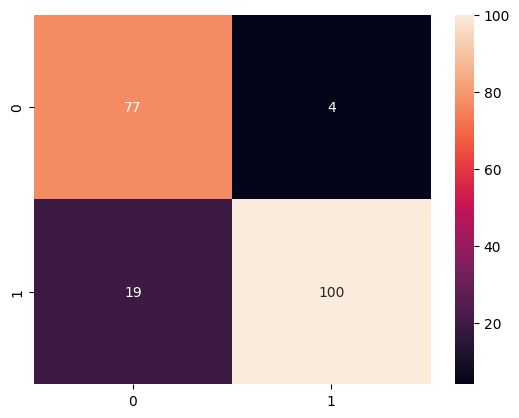

In [34]:
#generate random forest model for good app
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(realistic_good_app_data.drop(columns=['Allow_Loan']), realistic_good_app_data['Allow_Loan'], test_size=0.2, random_state=42)

count = 0
for i in y_train:
    if i == 0:
        count += 1
print(count)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


#evaluate model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = rf_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

# save model
import pickle
pickle.dump(rf_model, open('good_app_model.pkl', 'wb'))



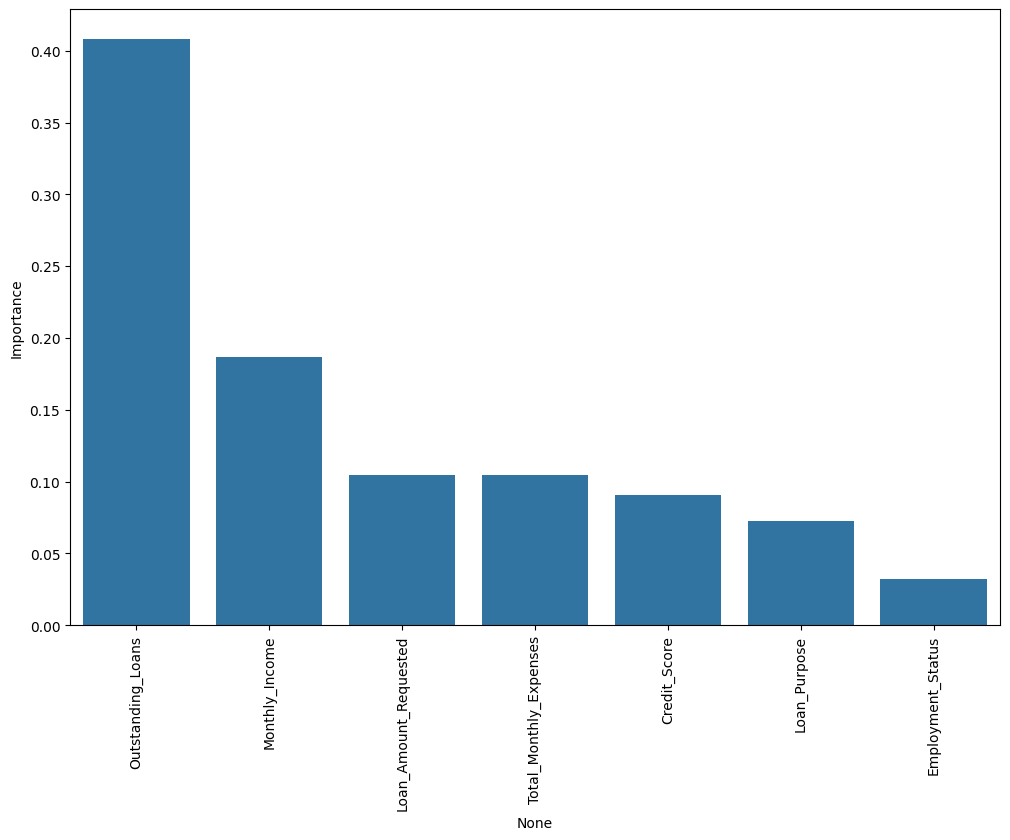

In [35]:
#show feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from our random forest model
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importances as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()



52
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.98      0.99      0.99       181

    accuracy                           0.97       200
   macro avg       0.96      0.89      0.92       200
weighted avg       0.97      0.97      0.97       200



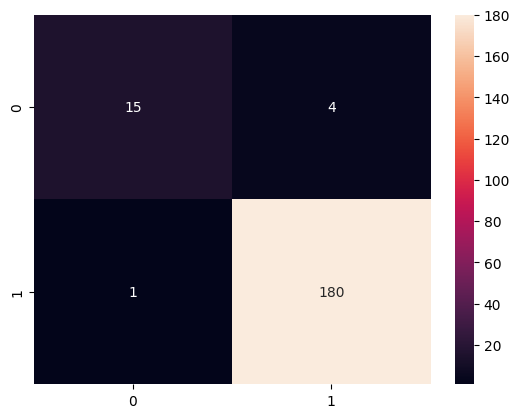

In [36]:
#generate random forest model for bad app
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(realistic_bad_app_data.drop(columns=['Allow_Loan']), realistic_bad_app_data['Allow_Loan'], test_size=0.2, random_state=42)

count = 0
for i in y_train:
    if i == 0:
        count += 1
print(count)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


#evaluate model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = rf_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

# save model
import pickle
pickle.dump(rf_model, open('bad_app_model.pkl', 'wb'))

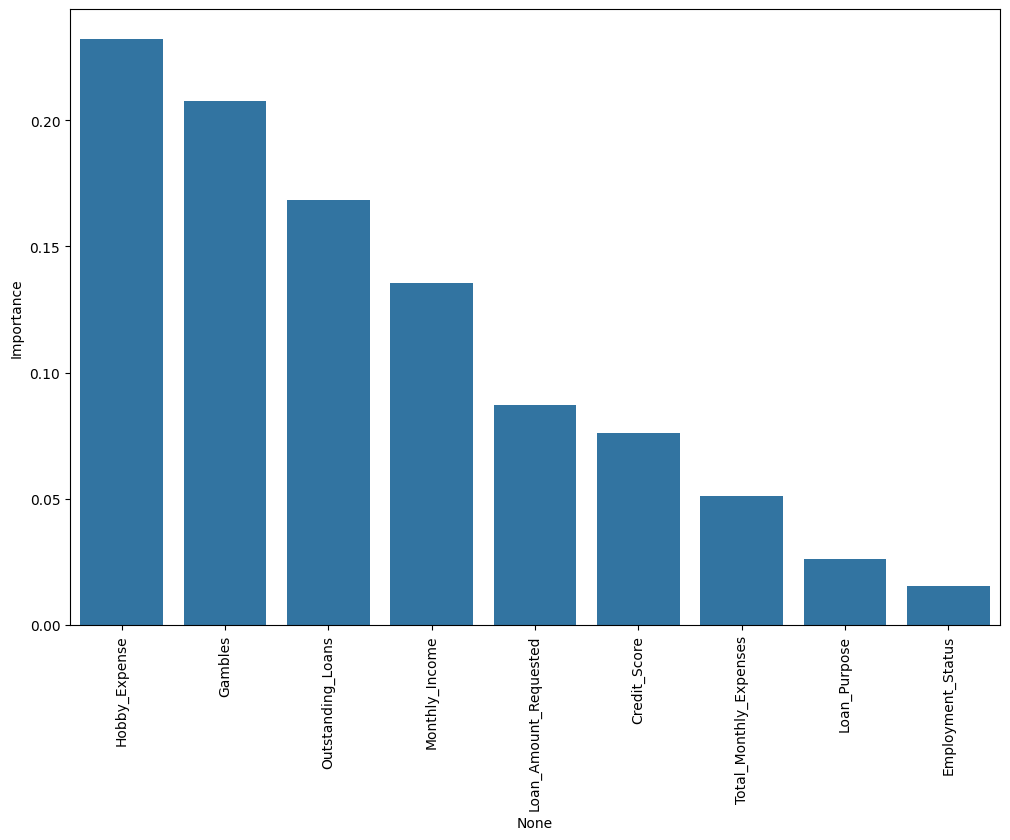

In [37]:

#show feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from our random forest model
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importances as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()